In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Datei einlesen
df = pd.read_csv(r'C:\Users\bedla\Documents\Ausbildung_Informatik\1_Praktikum\Praktikum_Daten-_und_Prozessanalyse\energy_trading\Daten\Gro_handelspreise_20201001_20251023_Viertelstunde.csv', sep=';')

print(df.head())

          Datum von         Datum bis  \
0  01.10.2020 00:00  01.10.2020 00:15   
1  01.10.2020 00:15  01.10.2020 00:30   
2  01.10.2020 00:30  01.10.2020 00:45   
3  01.10.2020 00:45  01.10.2020 01:00   
4  01.10.2020 01:00  01.10.2020 01:15   

  Deutschland/Luxemburg [€/MWh] Originalauflösungen  \
0                                             34,40   
1                                             34,40   
2                                             34,40   
3                                             34,40   
4                                             34,00   

  ∅ Anrainer DE/LU [€/MWh] Originalauflösungen  \
0                                        28,62   
1                                        28,62   
2                                        28,62   
3                                        28,62   
4                                        26,96   

  Belgien [€/MWh] Originalauflösungen Dänemark 1 [€/MWh] Originalauflösungen  \
0                               38,84    

In [8]:
print(df['Datum von'].isna().sum())
print(df[df['Datum von'].isna()].head(20))   # Zeige Beispielzeilen, wo Datum NaT ist

0
Empty DataFrame
Columns: [Datum von, Datum bis, Deutschland/Luxemburg [€/MWh] Originalauflösungen, ∅ Anrainer DE/LU [€/MWh] Originalauflösungen, Belgien [€/MWh] Originalauflösungen, Dänemark 1 [€/MWh] Originalauflösungen, Dänemark 2 [€/MWh] Originalauflösungen, Frankreich [€/MWh] Originalauflösungen, Niederlande [€/MWh] Originalauflösungen, Norwegen 2 [€/MWh] Originalauflösungen, Österreich [€/MWh] Originalauflösungen, Polen [€/MWh] Originalauflösungen, Schweden 4 [€/MWh] Originalauflösungen, Schweiz [€/MWh] Originalauflösungen, Tschechien [€/MWh] Originalauflösungen, DE/AT/LU [€/MWh] Originalauflösungen, Italien (Nord) [€/MWh] Originalauflösungen, Slowenien [€/MWh] Originalauflösungen, Ungarn [€/MWh] Originalauflösungen]
Index: []


In [9]:
print(df.head(30))    # Zeige die ersten 30 Zeilen der Datei
print(df.dtypes)      # Zeige die Typzuordnung der Spalten


           Datum von         Datum bis  \
0   01.10.2020 00:00  01.10.2020 00:15   
1   01.10.2020 00:15  01.10.2020 00:30   
2   01.10.2020 00:30  01.10.2020 00:45   
3   01.10.2020 00:45  01.10.2020 01:00   
4   01.10.2020 01:00  01.10.2020 01:15   
5   01.10.2020 01:15  01.10.2020 01:30   
6   01.10.2020 01:30  01.10.2020 01:45   
7   01.10.2020 01:45  01.10.2020 02:00   
8   01.10.2020 02:00  01.10.2020 02:15   
9   01.10.2020 02:15  01.10.2020 02:30   
10  01.10.2020 02:30  01.10.2020 02:45   
11  01.10.2020 02:45  01.10.2020 03:00   
12  01.10.2020 03:00  01.10.2020 03:15   
13  01.10.2020 03:15  01.10.2020 03:30   
14  01.10.2020 03:30  01.10.2020 03:45   
15  01.10.2020 03:45  01.10.2020 04:00   
16  01.10.2020 04:00  01.10.2020 04:15   
17  01.10.2020 04:15  01.10.2020 04:30   
18  01.10.2020 04:30  01.10.2020 04:45   
19  01.10.2020 04:45  01.10.2020 05:00   
20  01.10.2020 05:00  01.10.2020 05:15   
21  01.10.2020 05:15  01.10.2020 05:30   
22  01.10.2020 05:30  01.10.2020 0

In [10]:
# --- Datum richtig parsen ---
df['Datum von'] = pd.to_datetime(df['Datum von'], format='%d.%m.%Y %H:%M', errors='coerce')

# --- Preisspalte als float ---
spalte = 'Deutschland/Luxemburg [€/MWh] Originalauflösungen'
df[spalte] = pd.to_numeric(df[spalte].str.replace(',', '.'), errors='coerce')

# --- NA-Werte raus, DataFrame sortieren ---
df = df.dropna(subset=['Datum von', spalte])
df = df.sort_values('Datum von')

In [11]:
# --- Wochenmittelwert berechnen ---
df['Jahr'] = df['Datum von'].dt.year
df['Woche'] = df['Datum von'].dt.isocalendar().week
df_wochenmittel = df.groupby(['Jahr', 'Woche'])[spalte].mean()
df_wochenmittel.index = [f"{jahr}-W{woche:02d}" for jahr, woche in df_wochenmittel.index]

# --- Statistische Kennzahlen ---
gesamt_mittelwert = df_wochenmittel.mean()
gesamt_median = df_wochenmittel.median()
window_size = 4        # z.B. 4 Wochen gleitend
df_rolling = df_wochenmittel.rolling(window=window_size, center=True).mean()


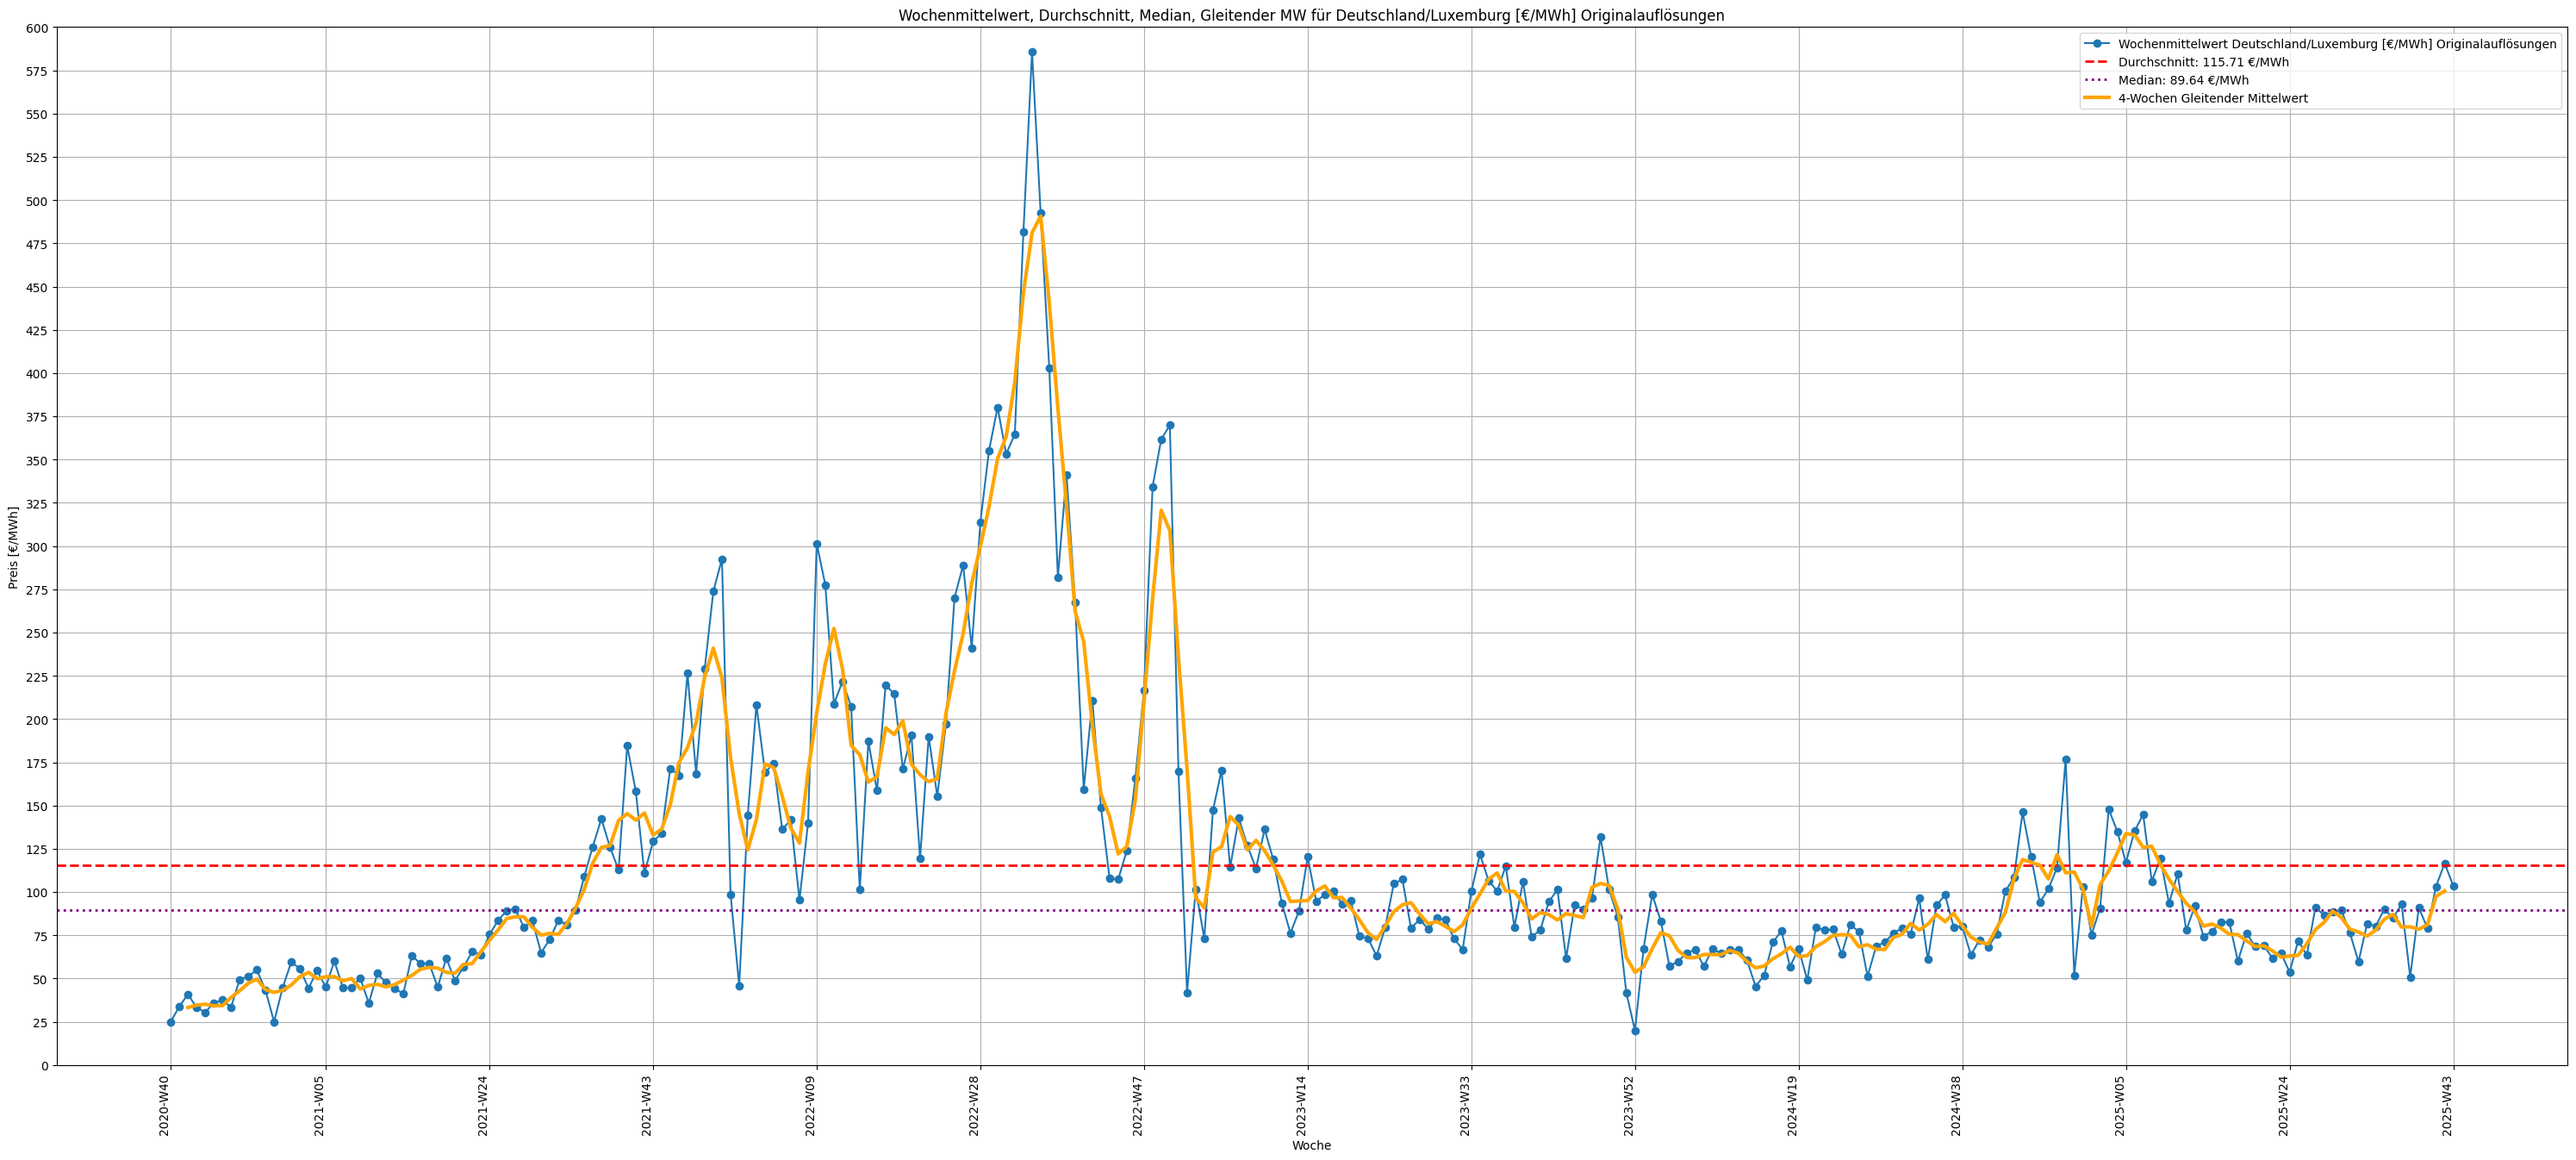

In [12]:
# --- xticks für übersichtliche X-Achse ---
num_xticks = 15
tick_indices = np.linspace(0, len(df_wochenmittel.index) - 1, num=num_xticks, dtype=int)

# --- Plot ---
plt.figure(figsize=(30, 13))
plt.plot(df_wochenmittel.index, df_wochenmittel.values, label=f'Wochenmittelwert {spalte}', marker='o')

# Mittelwert-Linie
plt.axhline(y=gesamt_mittelwert, color='red', linestyle='--', linewidth=2,
            label=f'Durchschnitt: {gesamt_mittelwert:.2f} €/MWh')

# Median-Linie
plt.axhline(y=gesamt_median, color='purple', linestyle=':', linewidth=2,
            label=f'Median: {gesamt_median:.2f} €/MWh')

# Gleitender Mittelwert
plt.plot(df_rolling.index, df_rolling.values, color='orange', linewidth=3, label=f'{window_size}-Wochen Gleitender Mittelwert')

plt.title(f'Wochenmittelwert, Durchschnitt, Median, Gleitender MW für {spalte}')
plt.xlabel('Woche')
plt.ylabel('Preis [€/MWh]')
plt.legend()
plt.grid(True)
plt.ylim(0, 600)
plt.yticks(range(0, 601, 25))    # 25er Schritte bis 600€
plt.tight_layout()
plt.xticks([df_wochenmittel.index[i] for i in tick_indices], rotation=90, ha='right')
plt.show()